# Your First Map

## Get started with plotting in GeoPandas

In [1]:
import geopandas as gpd

import pandas as pd

## Reading the data

There are many, many different geospatial file formats, such as `shapefile`, `GeoJSON`, `KML`, and `GPKG`. 

* shapefile is the most common file type that you'll encounter, and

* all of these file types can be quickly loaded with the gpd.read_file() function.

The next code cell loads a shapefile containing information about forests, wilderness areas, and other lands under the care of the Department of Environmental Conservation in the state of New York.

In [2]:
# Read in the data
full_data = gpd.read_file("archive/DEC_lands/DEC_lands/DEC_lands.shp")

# View the first five rows of the data
full_data.head()

,OBJECTID,CATEGORY,UNIT,FACILITY,CLASS,UMP,DESCRIPTIO,REGION,COUNTY,URL,SOURCE,UPDATE_,OFFICE,ACRES,LANDS_UID,GREENCERT,SHAPE_AREA,SHAPE_LEN,geometry
0,1,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,738.620192,103,N,2.990365e+06,7927.662385,"POLYGON ((486093.245 4635308.586, 486787.235 4..."
1,2,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,282.553140,1218,N,1.143940e+06,4776.375600,"POLYGON ((491931.514 4637416.256, 491305.424 4..."
2,3,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,234.291262,1780,N,9.485476e+05,5783.070364,"POLYGON ((486000.287 4635834.453, 485007.550 4..."
3,4,FOR PRES DET PAR,CFP,GREENE COUNTY FP DETACHED PARCEL,WILD FOREST,None,None,4,GREENE,http://www.dec.ny.gov/,GREENE RPP,5/12,STAMFORD,450.106464,2060,N,1.822293e+06,7021.644833,"POLYGON ((541716.775 4675243.268, 541217.579 4..."
4,6,FOREST PRESERVE,AFP,SARANAC LAKES WILD FOREST,WILD FOREST,SARANAC LAKES,None,5,ESSEX,http://www.dec.ny.gov/lands/22593.html,"DECRP, ESSEX RPP",12/96,RAY BROOK,69.702387,1517,N,2.821959e+05,2663.909932,"POLYGON ((583896.043 4909643.187, 583891.200 4..."


It can be seen that in the "CLASS" column, each of the first five rows corresponds to a different forest.

## Prerequisites

To view the first five rows of the data, the head() method is used. It can be recalled that this is also what we use to preview a Pandas DataFrame. In fact, every command that you can use with a DataFrame will work with the data!

This is because the data was loaded into a (GeoPandas) GeoDataFrame object that has all of the capabilities of a (Pandas) DataFrame.

In [3]:
type(full_data)

geopandas.geodataframe.GeoDataFrame

For instance, if we don't plan to use all of the columns, we can select a subset of them. *(To review other methods for selecting data, check out this tutorial from the Pandas micro-course)*.

In [4]:
data = full_data.loc[:, ["CLASS", "COUNTY", "geometry"]].copy()

The `value_counts()` method can be used to see a list of different land types, along with how many times they appear in the dataset. 

In [5]:
# How many lands of each type are there?
data.CLASS.value_counts()

WILD FOREST                   965
INTENSIVE USE                 108
PRIMITIVE                      60
WILDERNESS                     52
ADMINISTRATIVE                 17
UNCLASSIFIED                    7
HISTORIC                        5
PRIMITIVE BICYCLE CORRIDOR      4
CANOE AREA                      1
Name: CLASS, dtype: int64

Also `loc` (and `iloc`) and `isin` can be used to select subsets of the data.

In [6]:
# Select lands that fall under the "WILD FOREST" or "WILDERNESS" category
wild_lands = data.loc[data.CLASS.isin(['WILD FOREST', 'WILDERNESS'])].copy()
wild_lands.head()

,CLASS,COUNTY,geometry
0,WILD FOREST,DELAWARE,"POLYGON ((486093.245 4635308.586, 486787.235 4..."
1,WILD FOREST,DELAWARE,"POLYGON ((491931.514 4637416.256, 491305.424 4..."
2,WILD FOREST,DELAWARE,"POLYGON ((486000.287 4635834.453, 485007.550 4..."
3,WILD FOREST,GREENE,"POLYGON ((541716.775 4675243.268, 541217.579 4..."
4,WILD FOREST,ESSEX,"POLYGON ((583896.043 4909643.187, 583891.200 4..."


## First map plot!

It can quickly visualize the data with the `plot()` method

<AxesSubplot:>

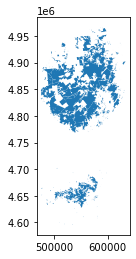

In [7]:
wild_lands.plot()

Every GeoDataFrame contains a special "geometry" column. It contains all of the geometric objects that are displayed when we call the `plot()` method.

In [8]:
# View the first five entries in the "geometry" column
wild_lands.geometry.head()

0    POLYGON ((486093.245 4635308.586, 486787.235 4...
1    POLYGON ((491931.514 4637416.256, 491305.424 4...
2    POLYGON ((486000.287 4635834.453, 485007.550 4...
3    POLYGON ((541716.775 4675243.268, 541217.579 4...
4    POLYGON ((583896.043 4909643.187, 583891.200 4...
Name: geometry, dtype: geometry

In the code cell below, three more GeoDataFrames are created, containing campsite locations (**Point**), foot trails (**LineString**), and county boundaries (**Polygon**).

In [9]:
# Campsites in New York state (Point)
POI_data = gpd.read_file("archive/DEC_pointsinterest/DEC_pointsinterest/Decptsofinterest.shp")
campsites = POI_data.loc[POI_data.ASSET=='PRIMITIVE CAMPSITE'].copy()

# Foot trails in New York state (LineString)
roads_trails = gpd.read_file("archive/DEC_roadstrails/DEC_roadstrails/Decroadstrails.shp")
trails = roads_trails.loc[roads_trails.ASSET=='FOOT TRAIL'].copy()

# County boundaries in New York state (Polygon)
counties = gpd.read_file("archive/NY_county_boundaries/NY_county_boundaries/NY_county_boundaries.shp")

Next, a map is created from all four GeoDataFrames.

The `plot()` method takes as (optional) input several parameters that can be used to customize the appearance. Most importantly, setting a value for ax ensures that all of the information is plotted on the same map.

<AxesSubplot:>

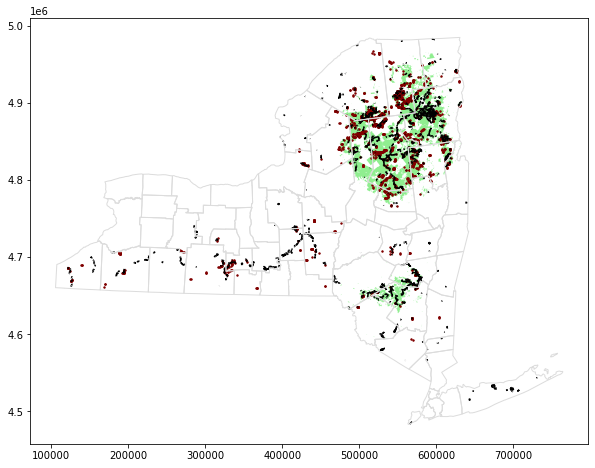

In [10]:
# Define a base map with county boundaries
ax = counties.plot(figsize=(10,10), color='none', edgecolor='gainsboro', zorder=3)

# Add wild lands, campsites, and foot trails to the base map
wild_lands.plot(color='lightgreen', ax=ax)
campsites.plot(color='maroon', markersize=2, ax=ax)
trails.plot(color='black', markersize=1, ax=ax)

## Coordinate reference system (CRS)

Setting the CRS
When we create a GeoDataFrame from a shapefile, the CRS is already imported for us.


In [11]:
# Load a GeoDataFrame containing regions in Ghana
regions = gpd.read_file("archive/ghana/ghana/Regions/Map_of_Regions_in_Ghana.shp")
print(regions.crs)

epsg:32630


How do you interpret that?

Coordinate reference systems are referenced by `European Petroleum Survey Group` (`EPSG`) codes.

This GeoDataFrame uses `EPSG 32630`, which is more commonly called the "Mercator" projection. This projection preserves angles (making it useful for sea navigation) and slightly distorts area.

However, when creating a GeoDataFrame from a CSV file, we have to set the CRS. EPSG 4326 corresponds to coordinates in latitude and longitude.

In [12]:
# Create a DataFrame with health facilities in Ghana
facilities_df = pd.read_csv("archive/ghana/ghana/health_facilities.csv")

# Convert the DataFrame to a GeoDataFrame
facilities = gpd.GeoDataFrame(facilities_df, geometry=gpd.points_from_xy(facilities_df.Longitude, facilities_df.Latitude))

# Set the coordinate reference system (CRS) to EPSG 4326
facilities.crs = {'init': 'epsg:4326'}

# View the first five rows of the GeoDataFrame
facilities.head()

/usr/local/lib64/python3.10/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude,geometry
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.40801,-1.96317,POINT (-1.96317 7.40801)
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.46312,-1.58592,POINT (-1.58592 6.46312)
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.22393,-1.34982,POINT (-1.34982 6.22393)
3,Ashanti,Afigya-Kwabre,Aboabogya Health Centre,Health Centre,Aboabogya,Government,6.84177,-1.61098,POINT (-1.61098 6.84177)
4,Ashanti,Kwabre,Aboaso Health Centre,Health Centre,Aboaso,Government,6.84177,-1.61098,POINT (-1.61098 6.84177)


In the code cell above, to create a GeoDataFrame from a CSV file, we needed to use both Pandas and GeoPandas:

* We begin by creating a DataFrame containing columns with latitude and longitude coordinates.

* To convert it to a GeoDataFrame, we use gpd.GeoDataFrame().

* The gpd.points_from_xy() function creates Point objects from the latitude and longitude columns.


### Re-projecting

Re-projecting refers to the process of changing the CRS. This is done in GeoPandas with the `to_crs()` method.

When plotting multiple GeoDataFrames, it's important that they all use the same CRS. In the code cell below, we change the CRS of the facilities GeoDataFrame to match the CRS of regions before plotting it.

<AxesSubplot:>

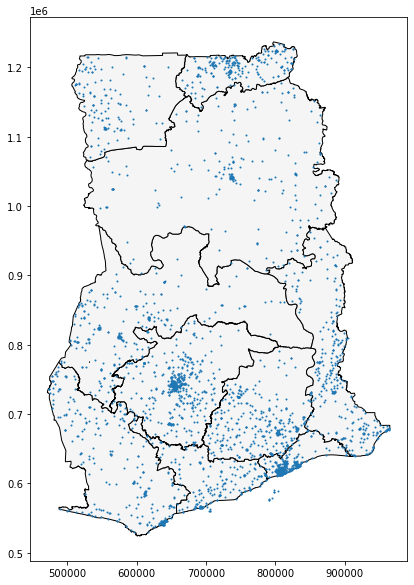

In [13]:
# Create a map
ax = regions.plot(figsize=(10,10), color='whitesmoke', linestyle='-', edgecolor='black')
facilities.to_crs(epsg=32630).plot(markersize=1, ax=ax)

The `to_crs()` method modifies only the "geometry" column: all other columns are left as-is.

In [14]:
# The "Latitude" and "Longitude" columns are unchanged
facilities.to_crs(epsg=32630).head()

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude,geometry
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.40801,-1.96317,POINT (614422.662 818986.851)
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.46312,-1.58592,POINT (656373.863 714616.547)
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.22393,-1.34982,POINT (682573.395 688243.477)
3,Ashanti,Afigya-Kwabre,Aboabogya Health Centre,Health Centre,Aboabogya,Government,6.84177,-1.61098,POINT (653484.490 756478.812)
4,Ashanti,Kwabre,Aboaso Health Centre,Health Centre,Aboaso,Government,6.84177,-1.61098,POINT (653484.490 756478.812)
